In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import itertools
from collections import OrderedDict

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.75)

In [3]:
def iterator__product_of_dict_values(**kwargs):
    ''' Given a dict whose values are lists, return iterator over products
    
    Returns
    -------
    my_iterator : iterator
    
    Examples
    --------
    >>> my_grid = {'a':[1,2,3], 'fruit':['pear', 'orange']}
    >>> _ = [print(a) for a in iterator__product_of_dict_values(my_grid)]
    OrderedDict([('a', 1), ('fruit', 'pear')])
    OrderedDict([('a', 1), ('fruit', 'orange')])
    OrderedDict([('a', 2), ('fruit', 'pear')])
    OrderedDict([('a', 2), ('fruit', 'orange')])
    OrderedDict([('a', 3), ('fruit', 'pear')])
    OrderedDict([('a', 3), ('fruit', 'orange')])
    '''
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield OrderedDict(zip(keys, instance))

# Load in data

In [4]:
df = pd.read_csv('fakeresults_accuracy_by_subject.csv')

In [5]:
df.head()

,classifier_name,subject_id,paradigm_name,n_generic_subjects_used_for_training,frac_of_target_subject_data_used_for_training,acc_at_10th,acc_at_25th,acc_at_50th,acc_at_75th,acc_at_90th
0,CNN,0,generic,4,0.0,0.5112,0.5555,0.6044,0.6518,0.6932
1,CNN,0,generic,16,0.0,0.5499,0.5966,0.6475,0.6961,0.7375
2,CNN,0,generic,64,0.0,0.6149,0.6612,0.7114,0.7575,0.7956
3,CNN,0,subject_specific,0,1.0,0.6846,0.7224,0.7623,0.7989,0.8291
4,CNN,0,subject_specific,4,1.0,0.6335,0.6688,0.7069,0.7430,0.7740


In [6]:
key_cols = ['classifier_nickname', 'subject_id', 'paradigm_name', 'n_generic_subjects_used_for_training', 'frac_of_target_subject_data_used_for_training']

In [7]:
chosen_colors = [
    '#a6cee3',
    '#1f78b4',
    '#b2df8a',
    '#33a02c',
    '#fb9a99',
    '#e31a1c']

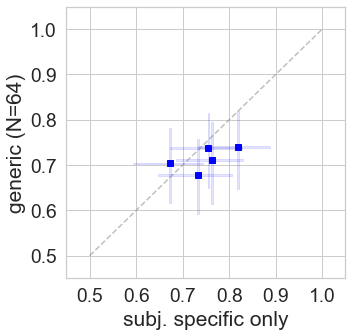

In [23]:
x_nickname = 'subj. specific only'
y_nickname = 'generic (N=64)'

x_query = "classifier_name == 'CNN' and paradigm_name == 'subject_specific' and n_generic_subjects_used_for_training == 0"
y_query = "classifier_name == 'CNN' and paradigm_name == 'generic' and n_generic_subjects_used_for_training == 64"

xticks = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
yticks = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
B = 0.05 # padding on each side of provided ticks
b = 0.002 # width of rectangle for each bar

W = 5
H = 5


_, axgrid = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(W, H))
axgrid = np.atleast_1d(axgrid)

for ii in range(axgrid.size):
    ax = axgrid[ii]
    ax.plot(xticks, xticks, '--', color='gray', alpha=0.5)

    x_df = df.query(x_query)
    y_df = df.query(y_query)
    
    assert x_df.shape[0] == y_df.shape[0]
    
    for ii in range(x_df.shape[0]):
        subject_id = str(x_df['subject_id'].values[ii])
        x_val = x_df['acc_at_50th'].values[ii]
        y_val = y_df['acc_at_50th'].values[ii]
        ax.plot(x_val, y_val, 's', label=subject_id, color='b')
        # Add horizontal bar
        xs = np.asarray([x_df['acc_at_10th'].values[ii], x_df['acc_at_90th'].values[ii]])
        ys = y_val * np.ones(2)
        ax.fill_between(xs, ys - b, ys + b, color='b', alpha=0.1)
        # Add vertical bar
        xs = np.asarray([x_val - b, x_val + b])
        ys_hi = y_df['acc_at_10th'].values[ii] * np.ones(2)
        ys_lo = y_df['acc_at_90th'].values[ii] * np.ones(2)
        ax.fill_between(xs, ys_lo, ys_hi, color='b', alpha=0.1)
    
    ax.set_ylim([yticks[0]-B, yticks[-1]+B])
    ax.set_yticks(yticks)
    
    ax.set_xlim([xticks[0]-B, xticks[-1]+B])
    ax.set_xticks(xticks)

    #ax.set_title('N = %d' % N)
    ax.set_xlabel(x_nickname)
    ax.set_ylabel(y_nickname)
    